The json file consists of a dict object with two keys:
1. 'experiment_parameters' : dictionary
2. 'data' : list where each element is a dictionary


#### 'experiment_parameters' <br>
experiment_title : str <br>
iteration : int <br>
date : str <br>
experiment_start_time : str <br>
rail_material : str <br>
phantom_material : str <br>
compared_curvature : int <br>
first_grating_idx : int <br>
last_grating_idx : int <br>
wav0 : list, float <br>
local_time : str <br>

#### 'data': list, each element is a dict, keys are listed as follows: <br>
elapsed_time : float <br>
line_number : int <br>
wav_data : list, float <br>
curvatures : list, float <br>
positions_2d : nested list, float <br>
positions_3d : nested list, float <br>

# Loading in json file

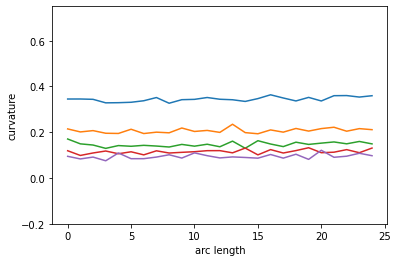

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
from simple_segment import segment, fit

folder1 = "exp1-ground_truth"
folder2 = "/bare_bare_"
string = ["30","50","70","90","110"]

for s in string:
    
    file = folder1 + folder2 + s + folder2 + s + "_iter1.json"

    with open(file, "r") as json_file:
        barebare = json.load(json_file)

    exp_params = barebare["experiment_parameters"]

    data = barebare["data"]

    # print('experiment params keys: ', exp_params.keys())
    # print()
    # print('data keys: ', data[0].keys())
    # print()
    # print('number of points: ', len(data))

    curvatures = data[0]['curvatures']

    plt.plot(curvatures)
    plt.xlabel('arc length')
    plt.ylabel('curvature')
    plt.ylim((-0.2,0.75));

# Piecewise Polynomial-Based Segmentation of Curvature

### Using fake data to validate segmented regression algorithm

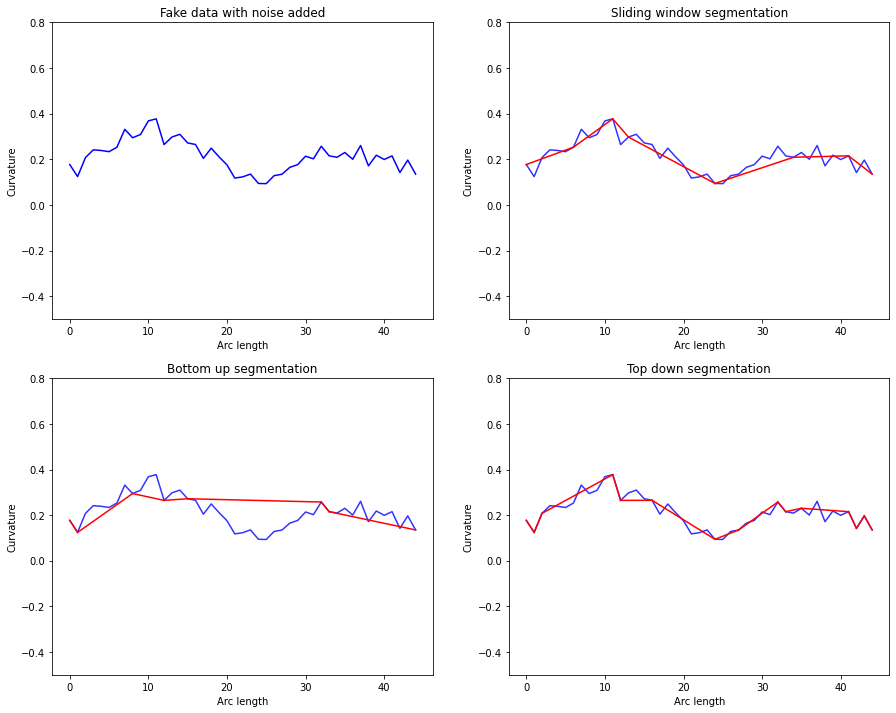

In [5]:
np.random.seed(10)

a = np.linspace(0.1,0.3,10)
b = np.linspace(0.3,0.05,15)
c = np.linspace(0.05,0.2,10)
d = np.linspace(0.2,0.1,10)
fake_data = np.concatenate((a,b,c,d))

noisy_data = np.random.random_sample(fake_data.shape) / 10
noisy_data = noisy_data + fake_data

max_error = 0.005

fig=plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.plot(noisy_data,'b')
plt.xlabel('Arc length')
plt.ylabel('Curvature')
plt.title('Fake data with noise added')
plt.ylim((-0.5,0.8));

plt.subplot(2,2,2)
segments = segment.slidingwindowsegment(noisy_data, fit.interpolate, fit.sumsquared_error, max_error)
segment.draw_plot(noisy_data,"Sliding window segmentation")
segment.draw_segments(segments)
plt.ylim((-0.5,0.8));

plt.subplot(2,2,3)
segments = segment.bottomupsegment(noisy_data, fit.interpolate, fit.sumsquared_error, max_error)
segment.draw_plot(noisy_data,"Bottom up segmentation")
segment.draw_segments(segments)
plt.ylim((-0.5,0.8));

plt.subplot(2,2,4)
segments = segment.topdownsegment(noisy_data, fit.interpolate, fit.sumsquared_error, max_error)
segment.draw_plot(noisy_data,"Top down segmentation")
segment.draw_segments(segments)
plt.ylim((-0.5,0.8));


### Segmentation on 1N run5